In [59]:
import pandas as pd
import numpy as np
import re
import plotly.graph_objects as go
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('merge_first_second_raw.csv')

In [3]:
df

price carpet_area bedrooms  \
0      49.3 Lac           N        2   
1      79.9 Lac         NaN        2   
2      86.3 Lac         NaN        2   
3      40.9 Lac           N        2   
4       1.35 Cr           N        3   
...         ...         ...      ...   
10902   1.31 Cr         NaN        3   
10903  72.1 Lac           N        2   
10904   1.06 Cr           N        3   
10905  85.7 Lac           N        3   
10906   1.47 Cr           N        3   

                                            builder paid_user  \
0                      ELV Projects Private Limited         Y   
1                                               NaN         Y   
2                     Silversand Infratech Pvt. Ltd         Y   
3                                               NaN         Y   
4                        Sri Aditya Homes Pvt. Ltd.         Y   
...                                             ...       ...   
10902                                           NaN         Y   
10903  Aakriti Constructions & Developers Pvt. Ltd.         Y   
10904                                  The Botanika         Y   
10905                           Fortune Green Homes         Y   
10906                     Saket Engineers Pvt. Ltd.         Y   

                         locality property_type user_type            agent  \
0                        Adibatla     Apartment   Builder     RANJITH DORA   
1      Manikonda, Outer Ring Road     Apartment   Builder     Pavan  Kumar   
2                     Hitech City     Apartment   Builder           Shegur   
3                         Aminpur     Apartment   Builder        Kumaran A   
4                        Shaikpet     Apartment   Builder          Ranjani   
...                           ...           ...       ...              ...   
10902  Pragathi Nagar, Kukatpally     Apartment   Builder  Ravinder  Reddy   
10903   Tellapur, Outer Ring Road     Apartment   Builder          Aakriti   
10904  Manikonda, Outer Ring Road     Apartment   Builder         Srilatha   
10905                  Bachupally     Apartment   Builder        Avinash K   
10906                    Kompally         Villa   Builder      Saket Group   

                                                    link  ... bedrooms2  \
0      https://www.magicbricks.com/propertyDetails/2-...  ...         2   
1      https://www.magicbricks.com/propertyDetails/2-...  ...         2   
2      https://www.magicbricks.com/propertyDetails/2-...  ...         2   
3      https://www.magicbricks.com/propertyDetails/2-...  ...         2   
4      https://www.magicbricks.com/propertyDetails/3-...  ...         3   
...                                                  ...  ...       ...   
10902  https://www.magicbricks.com/propertyDetails/3-...  ...         3   
10903  https://www.magicbricks.com/propertyDetails/2-...  ...         2   
10904  https://www.magicbricks.com/propertyDetails/3-...  ...         3   
10905  https://www.magicbricks.com/propertyDetails/3-...  ...         3   
10906  https://www.magicbricks.com/propertyDetails/3-...  ...         3   

      date_created                                      builder2 floor  \
0       20210811.0                          ELV Projects Pvt Ltd   NaN   
1       20210817.0                       AR Infra and Developers   NaN   
2       20210730.0          Silversand Infratech Private Limited   NaN   
3       20210723.0                                     Urbanrise   NaN   
4       20210810.0                    Sri Aditya Homes Pvt. Ltd.   NaN   
...            ...                                           ...   ...   
10902   20210712.0  Makuta Developers & Infrastructure Pvt. Ltd.   NaN   
10903   20210802.0                               Aakriti Housing   NaN   
10904   20210811.0                              Koncept Ambience   NaN   
10905   20210701.0                           Fortune Green Homes   NaN   
10906   20210817.0                                   Saket Group   NaN   

       furnished_stat

In [4]:
# Adjust the display settings
pd.set_option('display.max_columns', None)
df.head()

price carpet_area bedrooms                        builder paid_user  \
0  49.3 Lac           N        2   ELV Projects Private Limited         Y   
1  79.9 Lac         NaN        2                            NaN         Y   
2  86.3 Lac         NaN        2  Silversand Infratech Pvt. Ltd         Y   
3  40.9 Lac           N        2                            NaN         Y   
4   1.35 Cr           N        3     Sri Aditya Homes Pvt. Ltd.         Y   

                     locality property_type user_type         agent  \
0                    Adibatla     Apartment   Builder  RANJITH DORA   
1  Manikonda, Outer Ring Road     Apartment   Builder  Pavan  Kumar   
2                 Hitech City     Apartment   Builder        Shegur   
3                     Aminpur     Apartment   Builder     Kumaran A   
4                    Shaikpet     Apartment   Builder       Ranjani   

                                                link                prop_id  \
0  https://www.magicbricks.com/propertyDetails/2-...  domcache_srp_54364457   
1  https://www.magicbricks.com/propertyDetails/2-...  domcache_srp_56459889   
2  https://www.magicbricks.com/propertyDetails/2-...  domcache_srp_54835677   
3  https://www.magicbricks.com/propertyDetails/2-...  domcache_srp_55539835   
4  https://www.magicbricks.com/propertyDetails/3-...  domcache_srp_50279054   

                                               other bathrooms bedrooms2  \
0  ***super area*1285 sqft*****transaction*New Pr...         2         2   
1  ***super area*1268 sqft****status*Ready to Mov...         2         2   
2  ***super area*1150 sqft****status*Ready to Mov...         2         2   
3  ***super area*918 sqft****status**\t\t\t\t\t\t...         2         2   
4  ***super area*1895 sqft****status**\t\t\t\t\t\...         3         3   

   date_created                              builder2 floor furnished_status  \
0    20210811.0                  ELV Projects Pvt Ltd   NaN      Unfurnished   
1    20210817.0               AR Infra and Developers   NaN      Unfurnished   
2    20210730.0  Silversand Infratech Private Limited   NaN      Unfurnished   
3    20210723.0                             Urbanrise   NaN      Unfurnished   
4    20210810.0            Sri Aditya Homes Pvt. Ltd.   NaN      Unfurnished   

       price2            project_name property_type2     brand_new user_type2  
0   4927000.0          ELV Cosmopolis      Apartment  New Property    Builder  
1   7988400.0             AR The Nest      Apartment  New Property    Builder  
2   8625000.0  Silversand Cyberdyne 2      Apartment  New Property    Builder  
3   4085000.0    Spring Is In The Air      Apartment  New Property    Builder  
4  13549250.0           Aditya Athena      Apartment  New Property    Builder

In [5]:
df.columns

Index(['price', 'carpet_area', 'bedrooms', 'builder', 'paid_user', 'locality',
       'property_type', 'user_type', 'agent', 'link', 'prop_id', 'other',
       'bathrooms', 'bedrooms2', 'date_created', 'builder2', 'floor',
       'furnished_status', 'price2', 'project_name', 'property_type2',
       'brand_new', 'user_type2'],
      dtype='object')

In [6]:
df = df[['price','price2','bedrooms','bedrooms2','brand_new','builder','builder2','locality','property_type',
         'property_type2','furnished_status','floor','project_name','user_type','user_type2','carpet_area',
         'bathrooms','date_created','other','link','agent', 'paid_user','prop_id']]

In [7]:
df.head(30)

price      price2 bedrooms bedrooms2     brand_new  \
0   49.3 Lac   4927000.0        2         2  New Property   
1   79.9 Lac   7988400.0        2         2  New Property   
2   86.3 Lac   8625000.0        2         2  New Property   
3   40.9 Lac   4085000.0        2         2  New Property   
4    1.35 Cr  13549250.0        3         3  New Property   
5   78.4 Lac   7836000.0        2         2  New Property   
6   77.5 Lac   7750000.0        2         2  New Property   
7   52.5 Lac   5252000.0        2         2  New Property   
8     72 Lac   7200000.0        2         2  New Property   
9     96 Lac   9597696.0        3         3  New Property   
10  79.2 Lac   7923149.0        3         3  New Property   
11  59.3 Lac   5927790.0        2         2  New Property   
12  99.8 Lac   9980685.0        3         3  New Property   
13  73.2 Lac   7317516.0        2         2  New Property   
14  57.5 Lac   5751000.0        2         2  New Property   
15   1.26 Cr  12636000.0        3         3  New Property   
16  96.7 Lac   9670000.0        2         2  New Property   
17  73.2 Lac   7323215.0        2         2  New Property   
18   1.25 Cr  12540000.0        3         3  New Property   
19  68.4 Lac   6841009.0        2         2  New Property   
20    87 Lac   8696600.0        2         2  New Property   
21  71.6 Lac   7160000.0        2         2  New Property   
22   1.41 Cr  14100000.0        3         3  New Property   
23  73.1 Lac   7308000.0        2         2  New Property   
24      1 Cr  10022210.0        3         3  New Property   
25  18.9 Lac   1890000.0        2         2  New Property   
26  90.9 Lac   9091000.0        3         3  New Property   
27  97.9 Lac   9794000.0        3         3  New Property   
28   1.05 Cr  10542063.0        3         3  New Property   
29  64.5 Lac   6451500.0        2         2  New Property   

                                         builder  \
0                   ELV Projects Private Limited   
1                                            NaN   
2                  Silversand Infratech Pvt. Ltd   
3                                            NaN   
4                     Sri Aditya Homes Pvt. Ltd.   
5                                            BEL   
6                                            NaN   
7                 Muppa Projects India Pvt. Ltd.   
8             Manbhum Construction Co. Pvt. Ltd.   
9                                            NaN   
10                                           NaN   
11                        Aspire Spaces Pvt Ltd.   
12                   Sivaa Shakthi Constructions   
13                        Anuhar Homes Pvt. Ltd.   
14                                           NaN   
15                                  Ananda Homes   
16         Sharvani Ventures and Avenues Pvt Ltd   
17                        Vertex Homes Pvt. Ltd.   
18                                           NaN   
19  Aakriti Constructions & Developers Pvt. Ltd.   
20                                  The Botanika   
21                           Fortune Green Homes   
22                     Saket Engineers Pvt. Ltd.   
23                             Reliance Builders   
24                                           NaN   
25                           S B Avenues Pvt Ltd   
26                             Sri Gayatri Homes   
27                                           NaN   
28                                  Aliens Group   
29             Concrete Infra Projects India LLP   

                                         builder2  \
0                            ELV Projects Pvt Ltd   
1                         AR Infra and Developers   
2            Silversand Infratech Private Limited   
3                                       Urbanrise   
4                      Sri Aditya Homes Pvt. Ltd.   
5                        Brigade Enterprises Ltd.   
6                      SNR Nirman India Pvt. Ltd.   
7                  Muppa Projects India Pvt. Ltd.   
8              Manbhum Co

In [8]:
df.shape

(10907, 23)

In [9]:
df.columns

Index(['price', 'price2', 'bedrooms', 'bedrooms2', 'brand_new', 'builder',
       'builder2', 'locality', 'property_type', 'property_type2',
       'furnished_status', 'floor', 'project_name', 'user_type', 'user_type2',
       'carpet_area', 'bathrooms', 'date_created', 'other', 'link', 'agent',
       'paid_user', 'prop_id'],
      dtype='object')

In [10]:
df['builder'].nunique() #no of unique values in the series

266

In [11]:
df['builder2'].nunique()

577

In [12]:
df['builder'].count() #no of values in the series

293

In [13]:
df['builder2'].count()

1854

In [14]:
df['builder'].fillna('No Idea',inplace=True) 

df['builder_final'] = np.where(df['builder']=='No Idea',df['builder2'],df['builder'])

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1071152118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['builder'].fillna('No Idea',inplace=True)
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1071152118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['builder_final'] = np.where(df['builder']=='No Idea',df['builder2'],df['builder'])


In [15]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

                     locality property_type property_type2 furnished_status  \
0                    Adibatla     Apartment      Apartment      Unfurnished   
1  Manikonda, Outer Ring Road     Apartment      Apartment      Unfurnished   
2                 Hitech City     Apartment      Apartment      Unfurnished   
3                     Aminpur     Apartment      Apartment      Unfurnished   
4                    Shaikpet     Apartment      Apartment      Unfurnished   

  floor            project_name user_type user_type2 carpet_area bathrooms  \
0   NaN          ELV Cosmopolis   Builder    Builder           N         2   
1   NaN             AR The Nest   Builder    Builder         NaN         2   
2   NaN  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3   NaN    Spring Is In The Air   Builder    Builder           N         2   
4   NaN           Aditya Athena   Builder    Builder           N         3   

   date_created                                              other  \
0    20210811.0  ***super area*1285 sqft*****transaction*New Pr...   
1    20210817.0  ***super area*1268 sqft****status*Ready to Mov...   
2    20210730.0  ***super area*1150 sqft****status*Ready to Mov...   
3    20210723.0  ***super area*918 sqft****status**\t\t\t\t\t\t...   
4    20210810.0  ***super area*1895 sqft****status**\t\t\t\t\t\...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final  
0  domcache_srp_54364457   ELV Projects Private Limited  
1  domcache_srp_56459889        AR Infra and Developers  
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd  
3  domcache_srp_55539835                      Urbanrise  
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.

In [16]:
df['builder_final'].nunique()

797

In [17]:
df['builder_final'].count()

2018

In [18]:
df['other'] = df['other'].str.replace('\t',' ')
df['other'] = df['other'].str.replace('*',' ')

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1755868772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other'] = df['other'].str.replace('\t',' ')
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1755868772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['other'] = df['other'].str.replace('*',' ')


In [19]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

                     locality property_type property_type2 furnished_status  \
0                    Adibatla     Apartment      Apartment      Unfurnished   
1  Manikonda, Outer Ring Road     Apartment      Apartment      Unfurnished   
2                 Hitech City     Apartment      Apartment      Unfurnished   
3                     Aminpur     Apartment      Apartment      Unfurnished   
4                    Shaikpet     Apartment      Apartment      Unfurnished   

  floor            project_name user_type user_type2 carpet_area bathrooms  \
0   NaN          ELV Cosmopolis   Builder    Builder           N         2   
1   NaN             AR The Nest   Builder    Builder         NaN         2   
2   NaN  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3   NaN    Spring Is In The Air   Builder    Builder           N         2   
4   NaN           Aditya Athena   Builder    Builder           N         3   

   date_created                                              other  \
0    20210811.0     super area 1285 sqft     transaction New Pr...   
1    20210817.0     super area 1268 sqft    status Ready to Mov...   
2    20210730.0     super area 1150 sqft    status Ready to Mov...   
3    20210723.0     super area 918 sqft    status          Poss...   
4    20210810.0     super area 1895 sqft    status          Pos...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final  
0  domcache_srp_54364457   ELV Projects Private Limited  
1  domcache_srp_56459889        AR Infra and Developers  
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd  
3  domcache_srp_55539835                      Urbanrise  
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.

In [20]:
df['ready_to_move'] = np.where(df['other'].str.contains('Ready to Move',na=False),'Yes','NaN')

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\4106964464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ready_to_move'] = np.where(df['other'].str.contains('Ready to Move',na=False),'Yes','NaN')


In [21]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

                     locality property_type property_type2 furnished_status  \
0                    Adibatla     Apartment      Apartment      Unfurnished   
1  Manikonda, Outer Ring Road     Apartment      Apartment      Unfurnished   
2                 Hitech City     Apartment      Apartment      Unfurnished   
3                     Aminpur     Apartment      Apartment      Unfurnished   
4                    Shaikpet     Apartment      Apartment      Unfurnished   

  floor            project_name user_type user_type2 carpet_area bathrooms  \
0   NaN          ELV Cosmopolis   Builder    Builder           N         2   
1   NaN             AR The Nest   Builder    Builder         NaN         2   
2   NaN  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3   NaN    Spring Is In The Air   Builder    Builder           N         2   
4   NaN           Aditya Athena   Builder    Builder           N         3   

   date_created                                              other  \
0    20210811.0     super area 1285 sqft     transaction New Pr...   
1    20210817.0     super area 1268 sqft    status Ready to Mov...   
2    20210730.0     super area 1150 sqft    status Ready to Mov...   
3    20210723.0     super area 918 sqft    status          Poss...   
4    20210810.0     super area 1895 sqft    status          Pos...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final ready_to_move  
0  domcache_srp_54364457   ELV Projects Private Limited           NaN  
1  domcache_srp_56459889        AR Infra and Developers           Yes  
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd           Yes  
3  domcache_srp_55539835                      Urbanrise           NaN  
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.           NaN

In [22]:
search = []    
for value in df['other']:
    search.append(re.findall(r"Possession by \w\w\w\s'\d\d", value))
df['possession'] = search   

df['possession'] = df['possession'].apply(''.join)
df['possession']  = df['possession'].replace(r'^\s*$', np.nan, regex=True)
df['possession'] = df['possession'].str.replace(r'Possession by ','')
df['possession'] = df['possession'].str.replace(r"'",'')

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\3316787825.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['possession'] = search
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\3316787825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['possession'] = df['possession'].apply(''.join)
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\3316787825.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [23]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

                     locality property_type property_type2 furnished_status  \
0                    Adibatla     Apartment      Apartment      Unfurnished   
1  Manikonda, Outer Ring Road     Apartment      Apartment      Unfurnished   
2                 Hitech City     Apartment      Apartment      Unfurnished   
3                     Aminpur     Apartment      Apartment      Unfurnished   
4                    Shaikpet     Apartment      Apartment      Unfurnished   

  floor            project_name user_type user_type2 carpet_area bathrooms  \
0   NaN          ELV Cosmopolis   Builder    Builder           N         2   
1   NaN             AR The Nest   Builder    Builder         NaN         2   
2   NaN  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3   NaN    Spring Is In The Air   Builder    Builder           N         2   
4   NaN           Aditya Athena   Builder    Builder           N         3   

   date_created                                              other  \
0    20210811.0     super area 1285 sqft     transaction New Pr...   
1    20210817.0     super area 1268 sqft    status Ready to Mov...   
2    20210730.0     super area 1150 sqft    status Ready to Mov...   
3    20210723.0     super area 918 sqft    status          Poss...   
4    20210810.0     super area 1895 sqft    status          Pos...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final ready_to_move  \
0  domcache_srp_54364457   ELV Projects Private Limited           NaN   
1  domcache_srp_56459889        AR Infra and Developers           Yes   
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd           Yes   
3  domcache_srp_55539835                      Urbanrise           NaN   
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.           NaN   

  possession  
0        NaN  
1        NaN  
2        NaN  
3     Jan 23  
4     Dec 22

In [24]:
df['move_in'] = np.where(df['ready_to_move']=='NaN',df['possession'],df['ready_to_move'])
df['move_in'] = df['move_in'].str.replace('Yes','Aug 21')
df['move_in'] = pd.to_datetime(df['move_in'],format="%b %y")

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\267178335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['move_in'] = np.where(df['ready_to_move']=='NaN',df['possession'],df['ready_to_move'])
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\267178335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['move_in'] = df['move_in'].str.replace('Yes','Aug 21')
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\267178335.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [25]:
df.head(10)

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   
5  78.4 Lac   7836000.0        2         2  New Property   
6  77.5 Lac   7750000.0        2         2  New Property   
7  52.5 Lac   5252000.0        2         2  New Property   
8    72 Lac   7200000.0        2         2  New Property   
9    96 Lac   9597696.0        3         3  New Property   

                              builder  \
0        ELV Projects Private Limited   
1                             No Idea   
2       Silversand Infratech Pvt. Ltd   
3                             No Idea   
4          Sri Aditya Homes Pvt. Ltd.   
5                                 BEL   
6                             No Idea   
7      Muppa Projects India Pvt. Ltd.   
8  Manbhum Construction Co. Pvt. Ltd.   
9                             No Idea   

                                  builder2                    locality  \
0                     ELV Projects Pvt Ltd                    Adibatla   
1                  AR Infra and Developers  Manikonda, Outer Ring Road   
2     Silversand Infratech Private Limited                 Hitech City   
3                                Urbanrise                     Aminpur   
4               Sri Aditya Homes Pvt. Ltd.                    Shaikpet   
5                 Brigade Enterprises Ltd.                  Moti Nagar   
6               SNR Nirman India Pvt. Ltd.             LB Nagar, NH  9   
7           Muppa Projects India Pvt. Ltd.   Tellapur, Outer Ring Road   
8       Manbhum Construction Co. Pvt. Ltd.                    Kompally   
9  Subhashini Signature Services Pvt. Ltd.           Srisailam Highway   

  property_type property_type2 furnished_status floor  \
0     Apartment      Apartment      Unfurnished   NaN   
1     Apartment      Apartment      Unfurnished   NaN   
2     Apartment      Apartment      Unfurnished   NaN   
3     Apartment      Apartment      Unfurnished   NaN   
4     Apartment      Apartment      Unfurnished   NaN   
5     Apartment      Apartment      Unfurnished   NaN   
6     Apartment      Apartment      Unfurnished   NaN   
7     Apartment      Apartment      Unfurnished   NaN   
8     Apartment      Apartment      Unfurnished   NaN   
9         Villa          Villa      Unfurnished   NaN   

                    project_name user_type user_type2 carpet_area bathrooms  \
0                 ELV Cosmopolis   Builder    Builder           N         2   
1                    AR The Nest   Builder    Builder         NaN         2   
2         Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3           Spring Is In The Air   Builder    Builder           N         2   
4                  Aditya Athena   Builder    Builder           N         3   
5                Brigade Citadel   Builder    Builder           N         1   
6  SNR Sri Sri Kala Kuteers Gold   Builder    Builder           N         2   
7                  Muppas Melody   Builder    Builder           N         2   
8              Manbhum Home Tree   Builder    Builder           N         2   
9                  S Cube County   Builder    Builder           N         4   

   date_created                                              other  \
0    20210811.0     super area 1285 sqft     transaction New Pr...   
1    20210817.0     super area 1268 sqft    status Ready to Mov...   
2    20210730.0     super area 1150 sqft    status Ready to Mov...   
3    20210723.0     super area 918 sqft    status          Poss...   
4    20210810.0     super area 1895 sqft    status          Pos...   
5    20210813.0     super area 1174 sqft    status          Pos...   
6    20210809.0     super area 1250 sqft     transaction New Pr...   
7    20210814.0     

In [26]:
links_list = df['link'].tolist()
df['area_sqft'] = [x[50:54] for x in links_list]
df['area_sqft'] = df['area_sqft'].str.replace('-','')
df['area_sqft'] = df['area_sqft'].str.replace(r'[A-Za-z]+','')
df['area_sqft'] = df['area_sqft'].replace(r'^\s*$', np.nan, regex=True)

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1201070435.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_sqft'] = [x[50:54] for x in links_list]
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1201070435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_sqft'] = df['area_sqft'].str.replace('-','')
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1201070435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [27]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

                     locality property_type property_type2 furnished_status  \
0                    Adibatla     Apartment      Apartment      Unfurnished   
1  Manikonda, Outer Ring Road     Apartment      Apartment      Unfurnished   
2                 Hitech City     Apartment      Apartment      Unfurnished   
3                     Aminpur     Apartment      Apartment      Unfurnished   
4                    Shaikpet     Apartment      Apartment      Unfurnished   

  floor            project_name user_type user_type2 carpet_area bathrooms  \
0   NaN          ELV Cosmopolis   Builder    Builder           N         2   
1   NaN             AR The Nest   Builder    Builder         NaN         2   
2   NaN  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3   NaN    Spring Is In The Air   Builder    Builder           N         2   
4   NaN           Aditya Athena   Builder    Builder           N         3   

   date_created                                              other  \
0    20210811.0     super area 1285 sqft     transaction New Pr...   
1    20210817.0     super area 1268 sqft    status Ready to Mov...   
2    20210730.0     super area 1150 sqft    status Ready to Mov...   
3    20210723.0     super area 918 sqft    status          Poss...   
4    20210810.0     super area 1895 sqft    status          Pos...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final ready_to_move  \
0  domcache_srp_54364457   ELV Projects Private Limited           NaN   
1  domcache_srp_56459889        AR Infra and Developers           Yes   
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd           Yes   
3  domcache_srp_55539835                      Urbanrise           NaN   
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.           NaN   

  possession    move_in area_sqft  
0        NaN        NaT      1285  
1        NaN 2021-08-01      1268  
2        NaN 2021-08-01      1150  
3     Jan 23 2023-01-01       918  
4     Dec 22 2022-12-01      1895

In [28]:
df['date_created'] = df['date_created'].astype(int)
df['date_created'] = df['date_created'].astype(str)

def split(x):
    a = x[:4]
    b = x[4:6]
    c = x[6:]
    d = a+'-'+b+'-'+c
    return d

df['date_created2'] = [split(x) for x in df['date_created']]
df['date_created2'] = pd.to_datetime(df['date_created2'], format='%Y-%m-%d')

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\4093157549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_created'] = df['date_created'].astype(int)
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\4093157549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_created'] = df['date_created'].astype(str)
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\4093157549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [29]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

                     locality property_type property_type2 furnished_status  \
0                    Adibatla     Apartment      Apartment      Unfurnished   
1  Manikonda, Outer Ring Road     Apartment      Apartment      Unfurnished   
2                 Hitech City     Apartment      Apartment      Unfurnished   
3                     Aminpur     Apartment      Apartment      Unfurnished   
4                    Shaikpet     Apartment      Apartment      Unfurnished   

  floor            project_name user_type user_type2 carpet_area bathrooms  \
0   NaN          ELV Cosmopolis   Builder    Builder           N         2   
1   NaN             AR The Nest   Builder    Builder         NaN         2   
2   NaN  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3   NaN    Spring Is In The Air   Builder    Builder           N         2   
4   NaN           Aditya Athena   Builder    Builder           N         3   

  date_created                                              other  \
0     20210811     super area 1285 sqft     transaction New Pr...   
1     20210817     super area 1268 sqft    status Ready to Mov...   
2     20210730     super area 1150 sqft    status Ready to Mov...   
3     20210723     super area 918 sqft    status          Poss...   
4     20210810     super area 1895 sqft    status          Pos...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final ready_to_move  \
0  domcache_srp_54364457   ELV Projects Private Limited           NaN   
1  domcache_srp_56459889        AR Infra and Developers           Yes   
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd           Yes   
3  domcache_srp_55539835                      Urbanrise           NaN   
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.           NaN   

  possession    move_in area_sqft date_created2  
0        NaN        NaT      1285    2021-08-11  
1        NaN 2021-08-01      1268    2021-08-17  
2        NaN 2021-08-01      1150    2021-07-30  
3     Jan 23 2023-01-01       918    2021-07-23  
4     Dec 22 2022-12-01      1895    2021-08-10

In [30]:
df['locality'] = df['locality'].str.replace('NH  9','')
df['locality'] = df['locality'].str.replace('NH 2 2','')
df['locality'] = df['locality'].str.replace('NH 7','')
df['locality'] = df['locality'].str.replace(', Outer Ring Road','')
df['locality'] = df['locality'].str.replace(',','')

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\3365707699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality'] = df['locality'].str.replace('NH  9','')
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\3365707699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality'] = df['locality'].str.replace('NH 2 2','')
C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\3365707699.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [31]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

      locality property_type property_type2 furnished_status floor  \
0     Adibatla     Apartment      Apartment      Unfurnished   NaN   
1    Manikonda     Apartment      Apartment      Unfurnished   NaN   
2  Hitech City     Apartment      Apartment      Unfurnished   NaN   
3      Aminpur     Apartment      Apartment      Unfurnished   NaN   
4     Shaikpet     Apartment      Apartment      Unfurnished   NaN   

             project_name user_type user_type2 carpet_area bathrooms  \
0          ELV Cosmopolis   Builder    Builder           N         2   
1             AR The Nest   Builder    Builder         NaN         2   
2  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3    Spring Is In The Air   Builder    Builder           N         2   
4           Aditya Athena   Builder    Builder           N         3   

  date_created                                              other  \
0     20210811     super area 1285 sqft     transaction New Pr...   
1     20210817     super area 1268 sqft    status Ready to Mov...   
2     20210730     super area 1150 sqft    status Ready to Mov...   
3     20210723     super area 918 sqft    status          Poss...   
4     20210810     super area 1895 sqft    status          Pos...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final ready_to_move  \
0  domcache_srp_54364457   ELV Projects Private Limited           NaN   
1  domcache_srp_56459889        AR Infra and Developers           Yes   
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd           Yes   
3  domcache_srp_55539835                      Urbanrise           NaN   
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.           NaN   

  possession    move_in area_sqft date_created2  
0        NaN        NaT      1285    2021-08-11  
1        NaN 2021-08-01      1268    2021-08-17  
2        NaN 2021-08-01      1150    2021-07-30  
3     Jan 23 2023-01-01       918    2021-07-23  
4     Dec 22 2022-12-01      1895    2021-08-10

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10907 entries, 0 to 10906
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             10907 non-null  object        
 1   price2            10413 non-null  float64       
 2   bedrooms          10762 non-null  object        
 3   bedrooms2         10762 non-null  object        
 4   brand_new         10896 non-null  object        
 5   builder           10907 non-null  object        
 6   builder2          1854 non-null   object        
 7   locality          10162 non-null  object        
 8   property_type     10907 non-null  object        
 9   property_type2    10907 non-null  object        
 10  furnished_status  10422 non-null  object        
 11  floor             9212 non-null   object        
 12  project_name      2520 non-null   object        
 13  user_type         10907 non-null  object        
 14  user_type2        1090

In [33]:

df['area_sqft'] = pd.to_numeric(df['area_sqft'], errors='coerce')

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\4221586619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_sqft'] = pd.to_numeric(df['area_sqft'], errors='coerce')


In [34]:
df['area_sqft'] = df['area_sqft'].astype(float)

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\2375948316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_sqft'] = df['area_sqft'].astype(float)


In [35]:
df['price_persqft'] = df['price2']/df['area_sqft']

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\2243319970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_persqft'] = df['price2']/df['area_sqft']


In [36]:
df.head()

price      price2 bedrooms bedrooms2     brand_new  \
0  49.3 Lac   4927000.0        2         2  New Property   
1  79.9 Lac   7988400.0        2         2  New Property   
2  86.3 Lac   8625000.0        2         2  New Property   
3  40.9 Lac   4085000.0        2         2  New Property   
4   1.35 Cr  13549250.0        3         3  New Property   

                         builder                              builder2  \
0   ELV Projects Private Limited                  ELV Projects Pvt Ltd   
1                        No Idea               AR Infra and Developers   
2  Silversand Infratech Pvt. Ltd  Silversand Infratech Private Limited   
3                        No Idea                             Urbanrise   
4     Sri Aditya Homes Pvt. Ltd.            Sri Aditya Homes Pvt. Ltd.   

      locality property_type property_type2 furnished_status floor  \
0     Adibatla     Apartment      Apartment      Unfurnished   NaN   
1    Manikonda     Apartment      Apartment      Unfurnished   NaN   
2  Hitech City     Apartment      Apartment      Unfurnished   NaN   
3      Aminpur     Apartment      Apartment      Unfurnished   NaN   
4     Shaikpet     Apartment      Apartment      Unfurnished   NaN   

             project_name user_type user_type2 carpet_area bathrooms  \
0          ELV Cosmopolis   Builder    Builder           N         2   
1             AR The Nest   Builder    Builder         NaN         2   
2  Silversand Cyberdyne 2   Builder    Builder         NaN         2   
3    Spring Is In The Air   Builder    Builder           N         2   
4           Aditya Athena   Builder    Builder           N         3   

  date_created                                              other  \
0     20210811     super area 1285 sqft     transaction New Pr...   
1     20210817     super area 1268 sqft    status Ready to Mov...   
2     20210730     super area 1150 sqft    status Ready to Mov...   
3     20210723     super area 918 sqft    status          Poss...   
4     20210810     super area 1895 sqft    status          Pos...   

                                                link         agent paid_user  \
0  https://www.magicbricks.com/propertyDetails/2-...  RANJITH DORA         Y   
1  https://www.magicbricks.com/propertyDetails/2-...  Pavan  Kumar         Y   
2  https://www.magicbricks.com/propertyDetails/2-...        Shegur         Y   
3  https://www.magicbricks.com/propertyDetails/2-...     Kumaran A         Y   
4  https://www.magicbricks.com/propertyDetails/3-...       Ranjani         Y   

                 prop_id                  builder_final ready_to_move  \
0  domcache_srp_54364457   ELV Projects Private Limited           NaN   
1  domcache_srp_56459889        AR Infra and Developers           Yes   
2  domcache_srp_54835677  Silversand Infratech Pvt. Ltd           Yes   
3  domcache_srp_55539835                      Urbanrise           NaN   
4  domcache_srp_50279054     Sri Aditya Homes Pvt. Ltd.           NaN   

  possession    move_in  area_sqft date_created2  price_persqft  
0        NaN        NaT     1285.0    2021-08-11    3834.241245  
1        NaN 2021-08-01     1268.0    2021-08-17    6300.000000  
2        NaN 2021-08-01     1150.0    2021-07-30    7500.000000  
3     Jan 23 2023-01-01      918.0    2021-07-23    4449.891068  
4     Dec 22 2022-12-01     1895.0    2021-08-10    7150.000000

In [37]:
df.drop(columns=['price','bedrooms2','builder','builder2','property_type2','user_type2','carpet_area',
                'bathrooms','date_created','agent','prop_id','ready_to_move','possession','paid_user','other',
                'link'],
       inplace=True)

df = df.rename(columns={'builder_final':'builder','date_created2':'date_posted','price2':'price'})

df = df[['price','locality','property_type','bedrooms','brand_new','furnished_status','builder',
         'project_name','user_type','floor','date_posted','move_in','area_sqft','price_persqft']]

C:\Users\PATHBREAKER-20\AppData\Local\Temp\ipykernel_7236\1487499067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['price','bedrooms2','builder','builder2','property_type2','user_type2','carpet_area',


In [38]:
df.head()

price     locality property_type bedrooms     brand_new  \
0   4927000.0     Adibatla     Apartment        2  New Property   
1   7988400.0    Manikonda     Apartment        2  New Property   
2   8625000.0  Hitech City     Apartment        2  New Property   
3   4085000.0      Aminpur     Apartment        2  New Property   
4  13549250.0     Shaikpet     Apartment        3  New Property   

  furnished_status                        builder            project_name  \
0      Unfurnished   ELV Projects Private Limited          ELV Cosmopolis   
1      Unfurnished        AR Infra and Developers             AR The Nest   
2      Unfurnished  Silversand Infratech Pvt. Ltd  Silversand Cyberdyne 2   
3      Unfurnished                      Urbanrise    Spring Is In The Air   
4      Unfurnished     Sri Aditya Homes Pvt. Ltd.           Aditya Athena   

  user_type floor date_posted    move_in  area_sqft  price_persqft  
0   Builder   NaN  2021-08-11        NaT     1285.0    3834.241245  
1   Builder   NaN  2021-08-17 2021-08-01     1268.0    6300.000000  
2   Builder   NaN  2021-07-30 2021-08-01     1150.0    7500.000000  
3   Builder   NaN  2021-07-23 2023-01-01      918.0    4449.891068  
4   Builder   NaN  2021-08-10 2022-12-01     1895.0    7150.000000

In [39]:
df.shape

(10907, 14)

In [42]:
locations = df['locality'].value_counts()
locations = dict(locations)

fig = go.Figure()


fig = px.bar(y= list(locations.keys())[0:20],x=list(locations.values())[0:20],
             text=list(locations.values())[0:20],
             orientation='h',
             color=list(locations.values())[0:20],
             color_continuous_scale = 'Turbo'

            ) 

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 locations by Listings Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [43]:
df['locality'].nunique()

1085

In [44]:
df['locality'].count()

10162

In [45]:
builders = df['builder'].value_counts()
builders = dict(builders)

fig = go.Figure()
            
fig = px.bar(y= list(builders.keys())[0:20],x=list(builders.values())[0:20],
             text=list(builders.values())[0:20],
             orientation='h',
             color=list(builders.values())[0:20],
             color_continuous_scale = px.colors.sequential.Viridis

            ) 

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 Builders by Listings Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Builder',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [46]:
projects = df['project_name'].value_counts()
projects = dict(projects)

fig = go.Figure()

fig = px.bar(y= list(projects.keys())[0:20],x=list(projects.values())[0:20],
             text=list(projects.values())[0:20],
             orientation='h',
             color=list(projects.values())[0:20]
            )

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Top 20 Projects by Listings Count</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Count',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Project',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        nticks = 20,
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [47]:
df['project_name'].count()

2520

In [48]:
df['project_name'].nunique()

1342

In [49]:
import plotly.express as px

filt = (df['brand_new']=='New Property')
df2 = df.loc[filt]

possession_time = []

for i in range(2021,2027):
    filt = (df['move_in'].dt.year==i)
    df_new = df2.loc[filt]
    a = df_new.shape[0]
    possession_time.append(a)
    
list(map(int,possession_time))  

possession_names = ['Ready to Move','2022','2023','2024','2025','2026']

fig = px.pie(values=possession_time, names=possession_names)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Time of Possession (New Properties)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [50]:
df2['move_in'].count()

1217

In [52]:
import plotly.express as px

filt = (df['brand_new']=='Resale')
df3 = df.loc[filt]

possession_time = []

for i in range(2021,2027):
    filt = (df['move_in'].dt.year==i)
    df_new = df3.loc[filt]
    a = df_new.shape[0]
    possession_time.append(a)
    
list(map(int,possession_time))  

possession_names = ['Ready to Move','2022','2023','2024','2025','2026']

fig = px.pie(values=possession_time, names=possession_names)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Time of Possession (Resale Properties)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [53]:
df3['move_in'].count()

8829

In [54]:
furnished = df['furnished_status'].value_counts()
furnished = dict(furnished)

fig = px.pie(values=list(furnished.values()), names=list(furnished.keys()), hole=0.3,
            color_discrete_sequence=px.colors.sequential.Turbo)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(title_text="<b>Furnished Status</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.45,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

In [55]:
df['furnished_status'].count()

10422

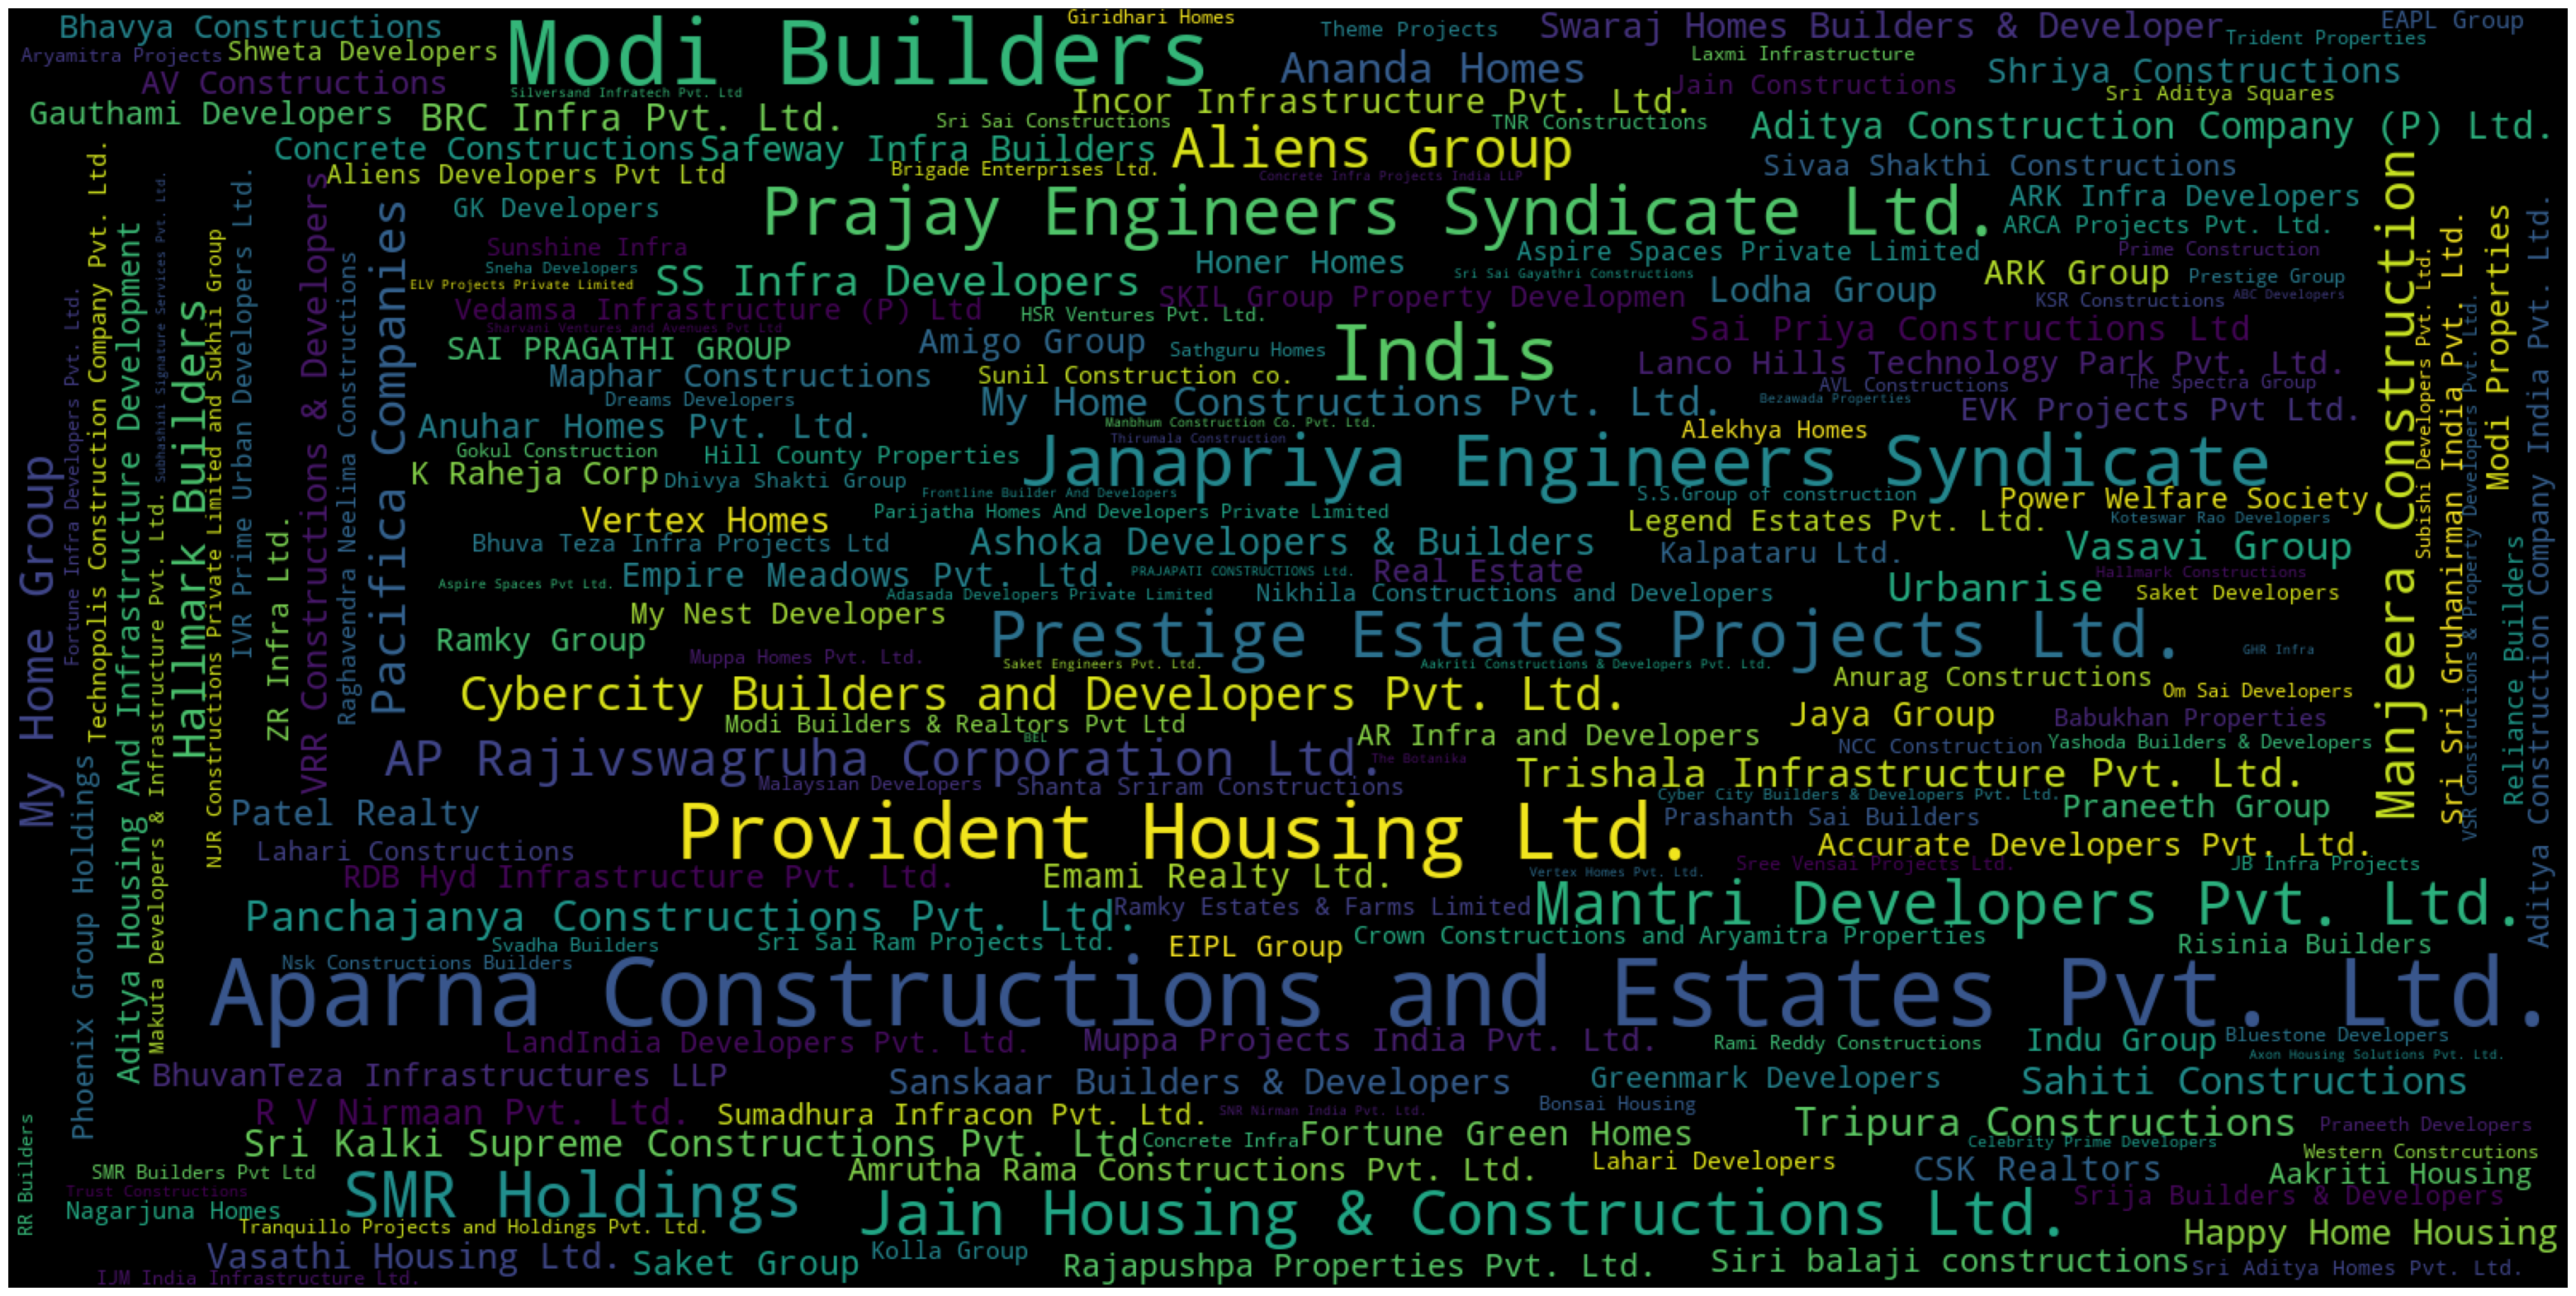

In [60]:
df['builder'] = df['builder'].replace(np.nan,'',regex=True)
builder_list = df['builder'].values.tolist()

count = Counter(builder_list)
wordcloud = WordCloud(width = 1600, height = 800)\
.generate_from_frequencies(count)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show() 

In [61]:
df['user_type'].count()

10907

In [64]:
df['price_persqft'] = df['price_persqft'].fillna(0).astype(int)

In [65]:
filt1 = (df['brand_new'] == 'New Property')
df1 = df.loc[filt1]

prop_grp1 = df1.groupby('property_type')
prop_pricesqft1 = prop_grp1['price_persqft'].median().tolist()
prop_pricesqft1 = [int(i) for i in prop_pricesqft1]

prop_price1 = prop_grp1['price'].median().tolist()
prop_price1 = [int(i) for i in prop_price1]

In [66]:
prop_pricesqft1

[4958, 4697, 4081, 6111, 0, 5496]

In [67]:
prop_price1

[6318000, 6000000, 5225000, 7800000, 1900000, 11000000]

In [68]:
filt2 = (df['brand_new'] == 'Resale')
df2 = df.loc[filt2]

prop_grp2 = df2.groupby('property_type')
prop_pricesqft2 = prop_grp2['price_persqft'].median().tolist()
prop_pricesqft2 = [int(i) for i in prop_pricesqft2]

prop_price2 = prop_grp2['price'].median().tolist()
prop_price2 = [int(i) for i in prop_price2]

In [69]:
prop_pricesqft2

[4761, 4360, 3726, 6012, 0, 5538]

In [70]:
prop_price2

[5800000, 5000000, 5500000, 7800000, 2000000, 9500000]

In [71]:
prop_types =['Apartment', 'Builder Floor Apartment', 'Penthouse','Residential House', 'Studio Apartment','Villa']

fig = go.Figure(data=[
    go.Bar(name='New Property', x=prop_types, y=prop_pricesqft1,text=prop_pricesqft1),
    go.Bar(name='Resale', x=prop_types, y=prop_pricesqft2,text=prop_pricesqft2)
])
fig.update_layout(barmode='group')

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Median Price/sqft (by Property Type)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.47,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Property Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)
fig.show()

In [72]:
df['price_persqft'].count()

10907

In [73]:
fig = go.Figure(data=[
    go.Bar(name='New Property', x=prop_types, y=prop_price1,text=prop_price1),
    go.Bar(name='Resale', x=prop_types, y=prop_price2,text=prop_price2)
])
fig.update_layout(barmode='group')

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Median Price (by Property Type)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.47,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Property Type',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)
fig.show()

In [74]:
df['price'].count()

10413

In [75]:
furnish_grp = df.groupby('furnished_status')
furnish_vals = furnish_grp['price_persqft'].median()

furnish_vals = dict(furnish_vals)

for key in furnish_vals:
    furnish_vals[key] = int(furnish_vals[key])

fig = go.Figure()

fig.add_trace(go.Bar(
    x= list(furnish_vals.keys()),
    y= list(furnish_vals.values()),
    name='Average Price per Sqft',
    marker_color=['green','white','red'],
    text=list(furnish_vals.values()))
             )

fig.update_traces(textposition='outside')

fig.update_layout(title_text="<b>Median Price/sqft (by Furnished Status)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='Furnished Status',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        nticks=48,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price/sqft (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 

In [82]:
median_list = []

for i in range(4,9):
    filt = (df['date_posted'].dt.month==i)
    df_new = df.loc[filt]
    median_list.append(df_new['price_persqft'].median())

median_list = list(map(int,median_list))    

median_names = ["April '21", "May '21", "June '21", "July '21", "August '21"]

fig = go.Figure()

fig.add_trace(go.Bar(
    x= median_names,
    y= median_list,
    name='Average Price per Sqft',
    marker_color='RoyalBlue',
    text=mean_list)
             )

fig.update_traces(textposition='outside')

fig.update_layout(title_text="<b>Median Price/sqft (by Month)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.5,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top'
                 )

fig.update_xaxes(
        color='teal',
        title_text='Month',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickmode='auto',
        nticks=48,
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Price/sqft (INR)',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        linecolor='red',
        linewidth=3,
        mirror = True) 

In [83]:
loc_grp = df.groupby('locality')
# loc_grp['price_persqft'].median().sort_values(ascending=False)[0:20]

In [86]:
df['loc_count'] = loc_grp['locality'].transform('count')

In [87]:
df.head()

price     locality property_type bedrooms     brand_new  \
0   4927000.0     Adibatla     Apartment        2  New Property   
1   7988400.0    Manikonda     Apartment        2  New Property   
2   8625000.0  Hitech City     Apartment        2  New Property   
3   4085000.0      Aminpur     Apartment        2  New Property   
4  13549250.0     Shaikpet     Apartment        3  New Property   

  furnished_status                        builder            project_name  \
0      Unfurnished   ELV Projects Private Limited          ELV Cosmopolis   
1      Unfurnished        AR Infra and Developers             AR The Nest   
2      Unfurnished  Silversand Infratech Pvt. Ltd  Silversand Cyberdyne 2   
3      Unfurnished                      Urbanrise    Spring Is In The Air   
4      Unfurnished     Sri Aditya Homes Pvt. Ltd.           Aditya Athena   

  user_type floor date_posted    move_in  area_sqft  price_persqft  loc_count  
0   Builder   NaN  2021-08-11        NaT     1285.0           3834       31.0  
1   Builder   NaN  2021-08-17 2021-08-01     1268.0           6300      253.0  
2   Builder   NaN  2021-07-30 2021-08-01     1150.0           7500       41.0  
3   Builder   NaN  2021-07-23 2023-01-01      918.0           4449       74.0  
4   Builder   NaN  2021-08-10 2022-12-01     1895.0           7150       33.0

In [88]:
filtn = (df['price_persqft']<10000) & (df['loc_count']>=10)
dfn = df.loc[filtn]

loc_grpn = dfn.groupby('locality')

In [89]:
median_vals = loc_grpn['price_persqft'].median().sort_values(ascending=False)

In [90]:
median_dict = dict(median_vals)

In [91]:
for key in median_dict:
    median_dict[key] = int(median_dict[key])

In [92]:
fig = go.Figure()

fig = px.bar(y=list(median_dict.keys())[0:20],x=list(median_dict.values())[0:20],
             text=list(median_dict.values())[0:20],
             orientation='h'
            )             

fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Most Expensive Locations (by Medium Price/sqft)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.95,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Price/sqft (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='red',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='red',
        linewidth=3,
        mirror = True)

In [93]:
median_vals_asc = loc_grpn['price_persqft'].median().sort_values(ascending=True)

median_dict_asc = dict(median_vals_asc)

for key in median_dict_asc:
    median_dict_asc[key] = int(median_dict_asc[key])

In [94]:
fig = go.Figure()

fig.add_trace(go.Bar(
    y= list(median_dict_asc.keys())[0:20],
    x= list(median_dict_asc.values())[0:20],
    orientation='h',
    marker_color='red',
    text=list(median_dict_asc.values())[0:20])
             )


fig.update_traces(textposition='outside')


fig.update_layout(title_text="<b>Least Expensive Locations (by Median Price/sqft)</b>",
                 title_font_size=25,
                 title_font_color='green',
                 title_font_family='Titillium Web',
                 title_x=0.57,
                 title_y=0.90,
                 title_xanchor='center',
                 title_yanchor='top',
                 yaxis={'categoryorder':'total ascending'}
                 )

fig.update_xaxes(
        color='teal',
        title_text='Price/sqft (INR)',
        title_font_family='Open Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        gridcolor='lightblue',
        tickmode='auto',
        linecolor='blue',
        linewidth=3,
        mirror=True)

fig.update_yaxes(
        color='Teal',
        title_text='Location',
        title_font_family='Droid Sans',
        title_font_size=20,
        title_font_color='maroon',
        title_standoff = 15,
        tickfont_family='Arial',
        gridcolor='lightblue',
        linecolor='blue',
        linewidth=3,
        mirror = True)
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'})

In [95]:
df['brand_new'].value_counts()

brand_new
Resale          9614
New Property    1281
Rent               1
Name: count, dtype: int64